In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import time

In [2]:
dataset_train = pd.read_csv('../../data/modified/addFeatureTrain.csv')
dataset_test = pd.read_csv('../../data/modified/addFeatureTest.csv')

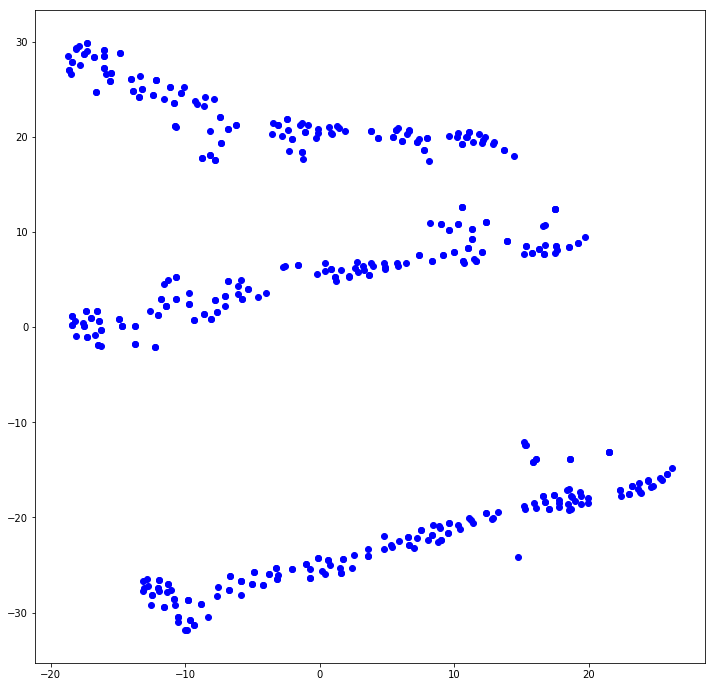

In [3]:
dados = dataset_train.iloc[:500, :280]

from sklearn.manifold import TSNE
mpl.rcParams['figure.figsize'] = (12, 12)
tsne = TSNE(n_components=2)
graf = tsne.fit_transform(dados)

for xis in range(len(graf)):
    plt.scatter(graf[xis][0], graf[xis][1], c='blue')
plt.show()

In [4]:
print(dataset_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 361 entries, V1 to V101_V143_V213_V232_V246
dtypes: float64(361)
memory usage: 144.3 MB
None


In [5]:
x_train = dataset_train.drop(columns=['y'])
y_train = dataset_train['y']

x_test = dataset_test.drop(columns=['y'])
y_test = dataset_test['y']

In [9]:
from sklearn.ensemble import RandomForestRegressor

model_rfg = RandomForestRegressor(n_estimators=100)

init = time.time()
model_rfg.fit(x_train, y_train)
y_pred = model_rfg.predict(x_test)
print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(model_rfg.score(x_test, y_test)))
print(cross_val_score(model_rfg,x_test, y_test,scoring='r2'))
print('MAE {}'.format(mean_absolute_error(y_test, y_pred)))

Execution time: 295.0591003894806 seconds
R2 score: 0.6320491997305041
[0.64869487 0.61958369 0.62685337]
MAE 0.3682762264828324


In [11]:
from sklearn.model_selection import cross_validate
cv = cross_validate(model_rfg, x_test, y_test, cv=5)
print(cv)

{'fit_time': array([22.06136155, 25.56248784, 26.24047399, 24.82039928, 23.56159019]), 'score_time': array([0.0301826 , 0.04007673, 0.04125762, 0.03722215, 0.03398442]), 'test_score': array([0.67308659, 0.62809929, 0.62649348, 0.61955714, 0.63182759]), 'train_score': array([0.95196131, 0.95251451, 0.95308565, 0.95215787, 0.95363238])}


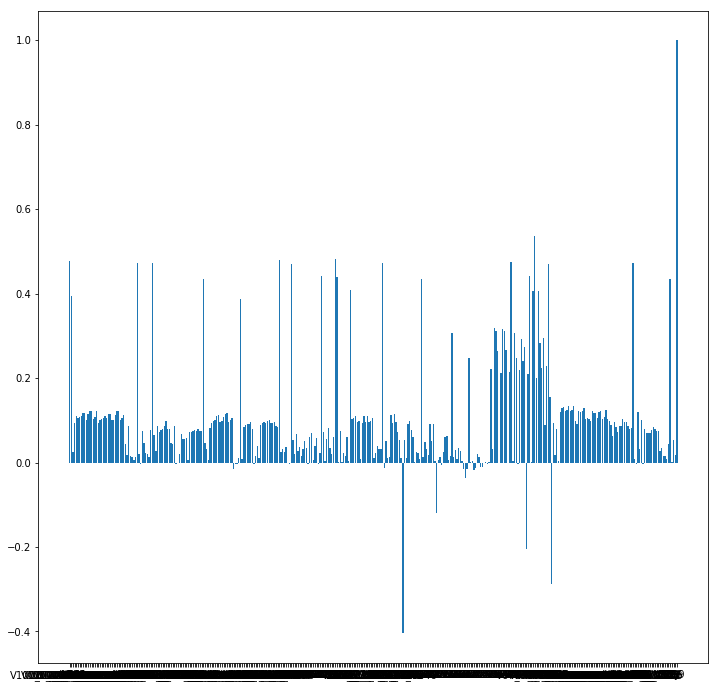

In [11]:
y_aux = dataset_train.corr()["y"] # individual correlation, variables with target
x_aux = dataset_train.columns
plt.bar(x_aux[0:len(y_aux)-1], y_aux[0:len(y_aux)-1])
plt.show()